In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['GOOG']

# Set up End and Start times for data grab
tech_list = ['GOOG']

end = datetime.now()
start = datetime(end.year - 30, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [GOOG]
company_name = ["GOOGLE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-06-11  177.720001  178.389999  175.440002  178.190002  178.190002   
2024-06-12  179.750000  182.080002  177.779999  179.559998  179.559998   
2024-06-13  177.839996  178.509995  176.660004  176.740005  176.740005   
2024-06-14  175.852005  178.729996  175.852005  178.369995  178.369995   
2024-06-17  176.979996  179.919998  176.490005  178.779999  178.779999   
2024-06-18  178.789993  178.910004  175.619995  176.449997  176.449997   
2024-06-20  176.710007  178.740005  176.460007  177.710007  177.710007   
2024-06-21  178.490005  182.511993  178.059998  180.259995  180.259995   
2024-06-24  181.279999  182.080002  180.229996  180.789993  180.789993   
2024-06-25  181.216507  182.259995  181.110001  182.029999  182.029999   

              Volume company_name  
Date                               
2024-06-11  14402400       GOOGLE  
2024-06-12  18600400       GOOGLE  
2024-06-13  15956900       GOOGLE  
2024-06-14  12361600       GOOGLE  
2024-06-17  15272900       GOOGLE  
2024-06-18  15640300       GOOGLE  
2024-06-20  16753200       GOOGLE  
2024-06-21  59728000       GOOGLE  
2024-06-24  18019600       GOOGLE  
2024-06-25   1081208       GOOGLE

In [3]:
# Summary Stats
GOOG.describe()

Open         High          Low        Close    Adj Close  \
count  4996.000000  4996.000000  4996.000000  4996.000000  4996.000000   
mean     44.587959    45.059009    44.143456    44.612427    44.562165   
std      42.367423    42.839278    41.955344    42.410926    42.364134   
min       2.470490     2.534002     2.390042     2.490913     2.488082   
25%      12.980346    13.132153    12.852326    12.992364    12.977597   
50%      26.922999    27.126525    26.739561    26.925076    26.894471   
75%      59.847125    60.320050    59.386927    59.926875    59.858759   
max     181.279999   182.511993   181.110001   182.029999   182.029999   

             Volume  
count  4.996000e+03  
mean   1.162287e+08  
std    1.499956e+08  
min    1.584340e+05  
25%    2.753528e+07  
50%    5.696303e+07  
75%    1.434788e+08  
max    1.650833e+09

In [4]:
# General info
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4996 entries, 2004-08-19 to 2024-06-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4996 non-null   float64
 1   High          4996 non-null   float64
 2   Low           4996 non-null   float64
 3   Close         4996 non-null   float64
 4   Adj Close     4996 non-null   float64
 5   Volume        4996 non-null   int64  
 6   company_name  4996 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 312.2+ KB


In [5]:
# Describes the following aspects of the data: Type of the data (integer, float, Python object, etc.)
GOOG.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
company_name     object
dtype: object

In [6]:
#Print the shape of Dataframe
rows, columns = GOOG.shape
print(f"\nThe Dataset has {rows} rows and {columns} columns.")


The Dataset has 4996 rows and 7 columns.


In [7]:
#Check for Null Values
print('Null Values in Dataframe:\n', df.isnull().sum())

Null Values in Dataframe:
 Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64


In [8]:
GOOG.head()

Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

           company_name  
Date                     
2004-08-19       GOOGLE  
2004-08-20       GOOGLE  
2004-08-23       GOOGLE  
2004-08-24       GOOGLE  
2004-08-25       GOOGLE

In [9]:
GOOG.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-06-18  178.789993  178.910004  175.619995  176.449997  176.449997   
2024-06-20  176.710007  178.740005  176.460007  177.710007  177.710007   
2024-06-21  178.490005  182.511993  178.059998  180.259995  180.259995   
2024-06-24  181.279999  182.080002  180.229996  180.789993  180.789993   
2024-06-25  181.216507  182.259995  181.110001  182.029999  182.029999   

              Volume company_name  
Date                               
2024-06-18  15640300       GOOGLE  
2024-06-20  16753200       GOOGLE  
2024-06-21  59728000       GOOGLE  
2024-06-24  18019600       GOOGLE  
2024-06-25   1081208       GOOGLE

In [10]:
GOOG.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2024-06-11', '2024-06-12', '2024-06-13', '2024-06-14',
               '2024-06-17', '2024-06-18', '2024-06-20', '2024-06-21',
               '2024-06-24', '2024-06-25'],
              dtype='datetime64[ns]', name='Date', length=4996, freq=None)

In [11]:
GOOG['Year'] = GOOG.index.year
GOOG['Month'] = GOOG.index.month
GOOG['Day'] = GOOG.index.day

In [12]:
GOOG.head()

Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

           company_name  Year  Month  Day  
Date                                       
2004-08-19       GOOGLE  2004      8   19  
2004-08-20       GOOGLE  2004      8   20  
2004-08-23       GOOGLE  2004      8   23  
2004-08-24       GOOGLE  2004      8   24  
2004-08-25       GOOGLE  2004      8   25

#### Open price

Text(0, 0.5, 'price')

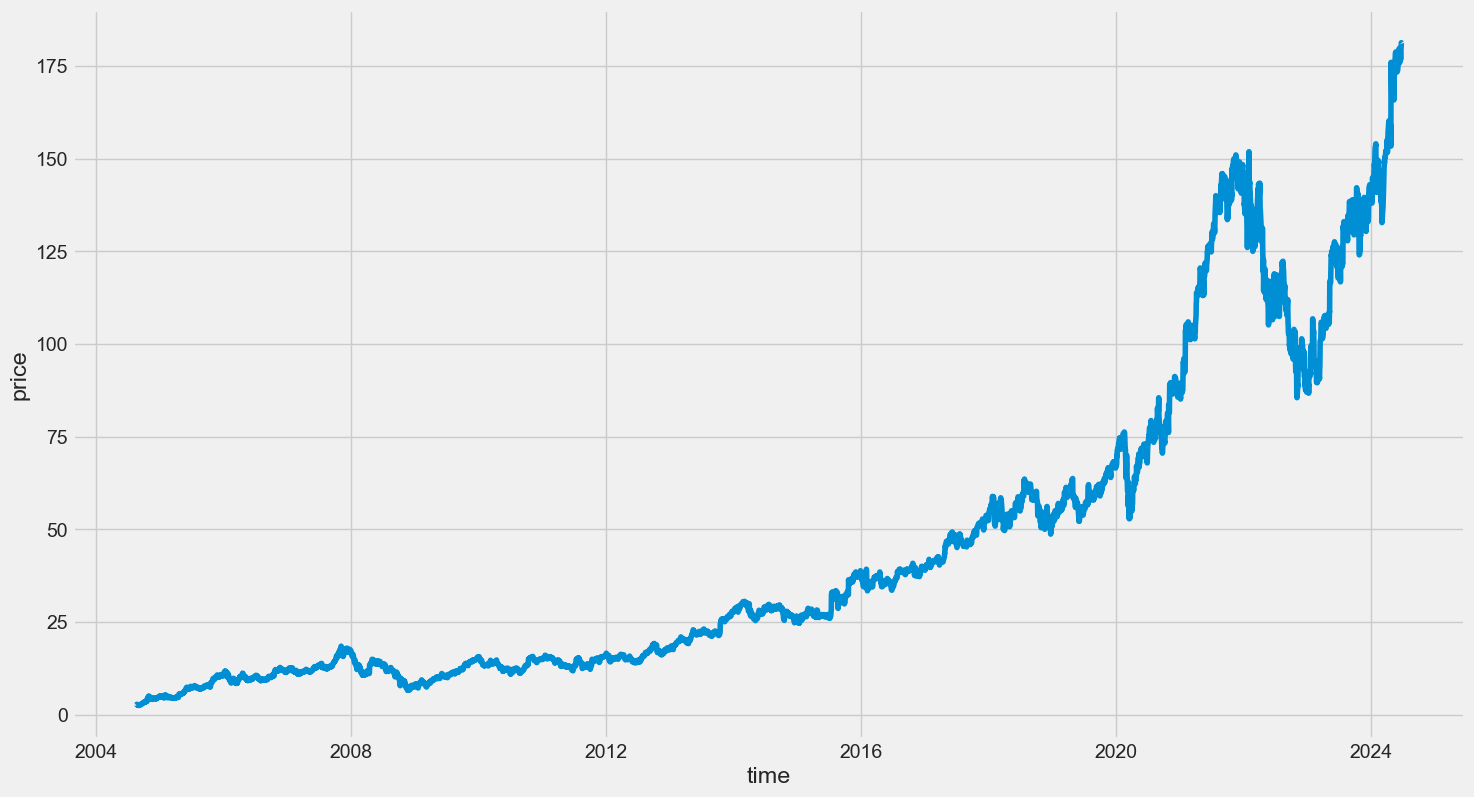

In [13]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=GOOG['Open'], x=GOOG.index)
plt.xlabel('time')
plt.ylabel('price')

#### Closing price

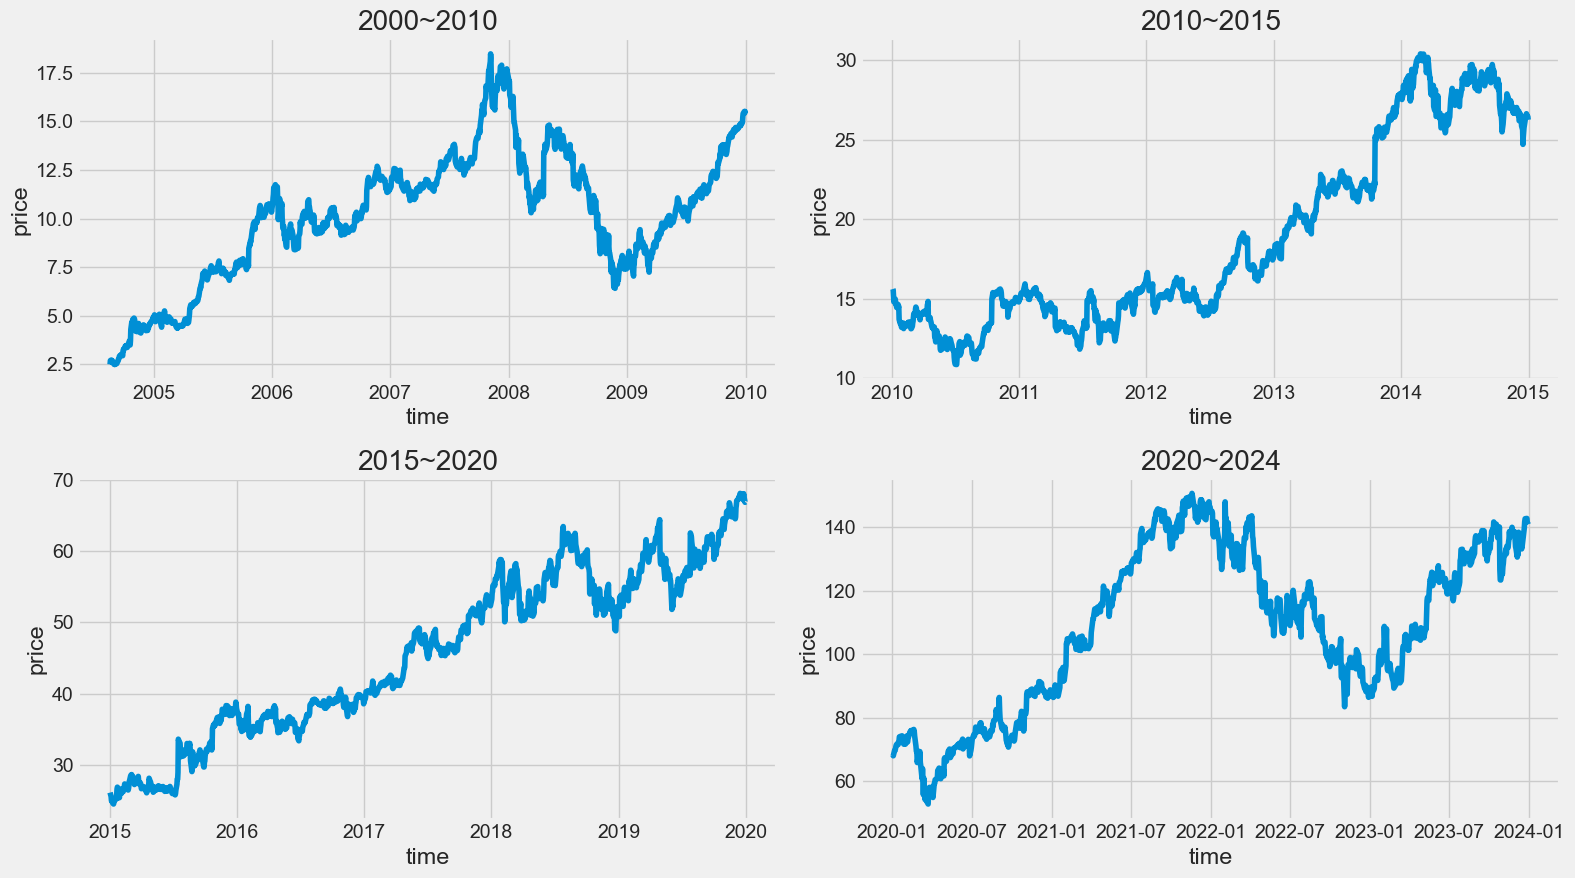

In [14]:
time_steps = [['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020'],
              ['2020', '2024']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = GOOG.loc[(GOOG.index > time_steps[i][0]) & (GOOG.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

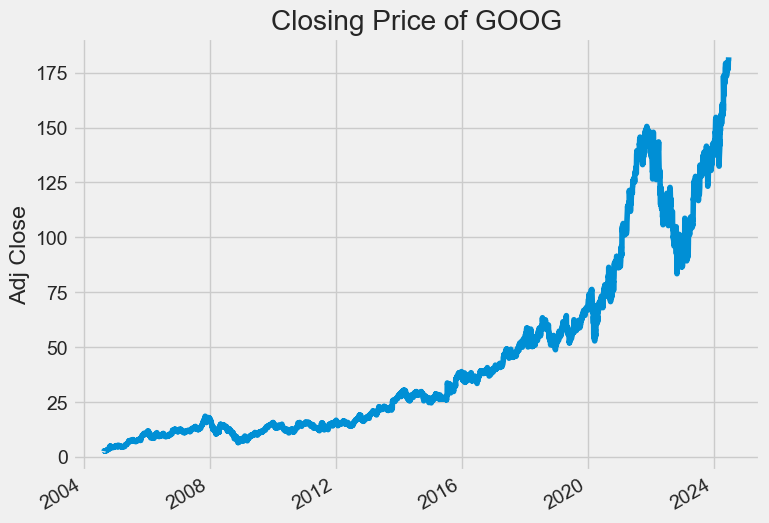

In [15]:
#historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

#### Volume of slaes

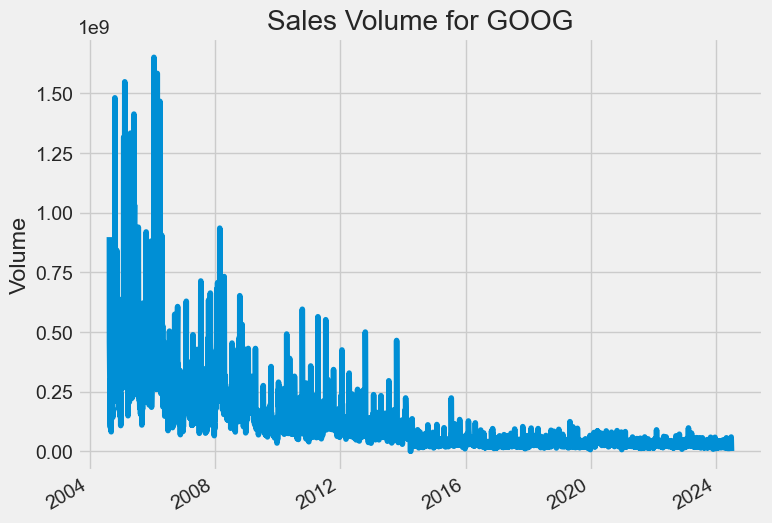

In [16]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

#### Predic closing price/Data preprocessing

In [17]:
# Get the stock quote
df = pdr.get_data_yahoo('GOOG', start='2010-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04   15.615220   15.678981   15.547723   15.610239   15.592496   
2010-01-05   15.620949   15.637387   15.480475   15.541497   15.523831   
2010-01-06   15.588072   15.588072   15.102393   15.149715   15.132495   
2010-01-07   15.178109   15.193053   14.760922   14.797037   14.780218   
2010-01-08   14.744733   15.024933   14.672753   14.994298   14.977255   
...                ...         ...         ...         ...         ...   
2024-06-18  178.789993  178.910004  175.619995  176.449997  176.449997   
2024-06-20  176.710007  178.740005  176.460007  177.710007  177.710007   
2024-06-21  178.490005  182.511993  178.059998  180.259995  180.259995   
2024-06-24  181.279999  182.080002  180.229996  180.789993  180.789993   
2024-06-25  181.216507  182.259995  181.110001  182.100006  182.100006   

               Volume  
Date                   
2010-01-04   78541293  
2010-01-05  120638494  
2010-01-06  159744526  
2010-01-07  257533695  
2010-01-08  189680313  
...               ...  
2024-06-18   15640300  
2024-06-20   16753200  
2024-06-21   59728000  
2024-06-24   18019600  
2024-06-25    1096078  

[3643 rows x 6 columns]

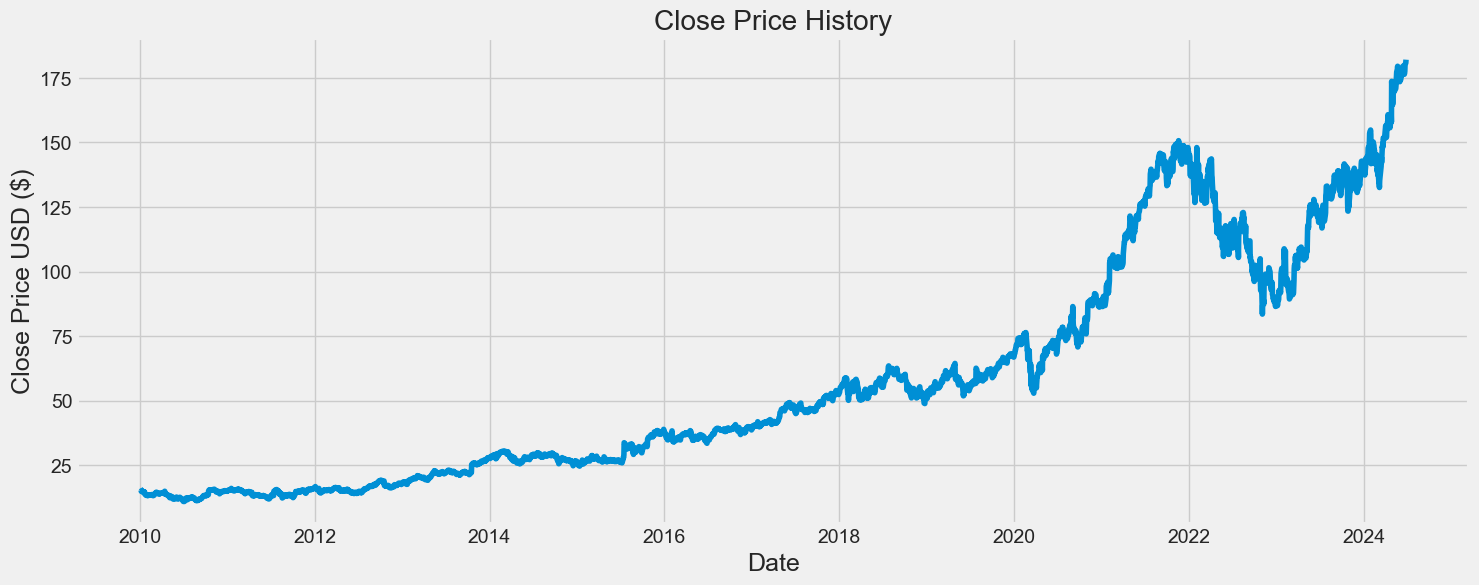

In [18]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [19]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3461

In [20]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02773434],
       [0.0273329 ],
       [0.02504497],
       ...,
       [0.98925471],
       [0.9923498 ],
       [1.        ]])

In [21]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02773434, 0.0273329 , 0.02504497, 0.02298541, 0.02413737,
       0.02400501, 0.02245888, 0.0219658 , 0.02236725, 0.02093456,
       0.02204289, 0.0209942 , 0.021368  , 0.01657253, 0.01511658,
       0.01546857, 0.01542203, 0.01428607, 0.01365336, 0.01410134,
       0.01382499, 0.01523585, 0.01319374, 0.01384971, 0.01416679,
       0.01459878, 0.01430933, 0.01459296, 0.01411589, 0.01530566,
       0.01485623, 0.01558493, 0.01522713, 0.01552384, 0.01439952,
       0.01387589, 0.01314282, 0.01319665, 0.01405334, 0.01527076,
       0.01589037, 0.01723869, 0.01863791, 0.01838629, 0.01805321,
       0.02041822, 0.02110038, 0.02086766, 0.01848811, 0.01878191,
       0.01883427, 0.01895645, 0.01802557, 0.01766195, 0.01642562,
       0.01763722, 0.01844447, 0.01841683, 0.01838193, 0.01900154])]
[0.019061176482775083]

[array([0.02773434, 0.0273329 , 0.02504497, 0.02298541, 0.02413737,
       0.02400501, 0.02245888, 0.0219658 , 0.02236725, 0.02093456,
       0.02204289, 0.0209942 , 0.0

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\gnco2\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3401/3401 ━━━━━━━━━━━━━━━━━━━━ 146s 41ms/step - loss: 0.0016


In [23]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step


7.2321539017648675

C:\Users\gnco2\AppData\Local\Temp\ipykernel_33012\1906463444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


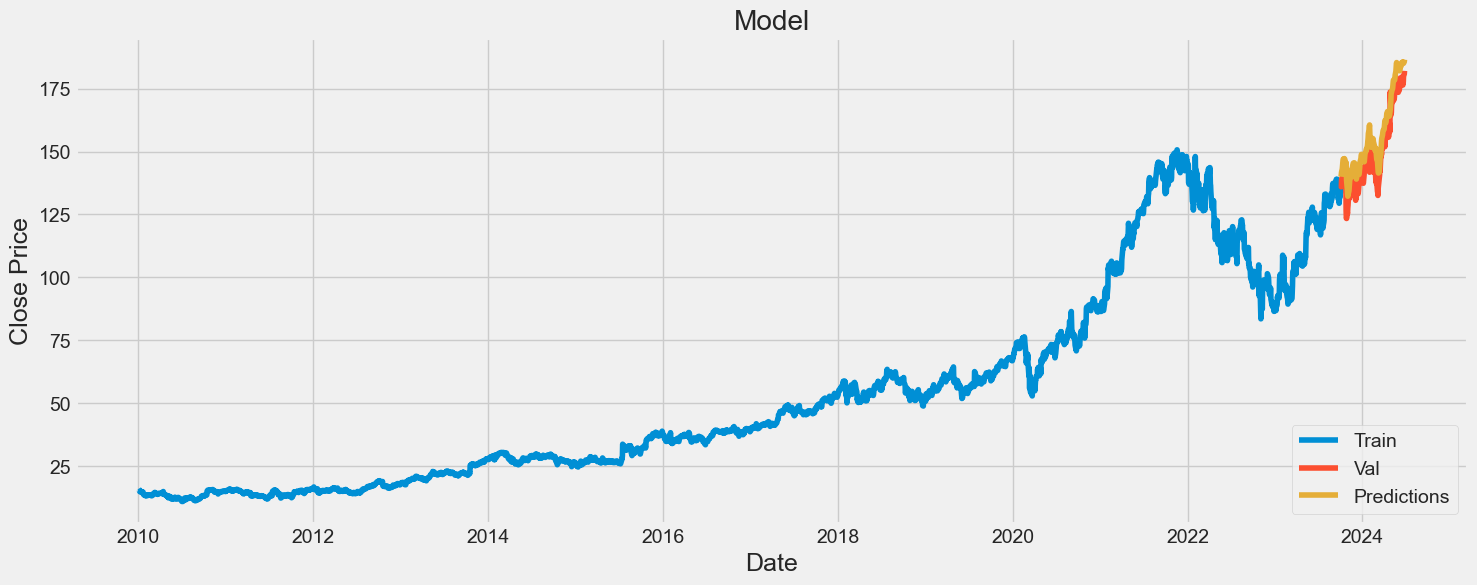

In [25]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
# Show the valid and predicted prices
valid

Close  Predictions
Date                               
2023-10-04  136.270004   140.000198
2023-10-05  135.990005   140.998337
2023-10-06  138.729996   141.821365
2023-10-09  139.500000   143.080734
2023-10-10  139.199997   144.354111
...                ...          ...
2024-06-18  176.449997   185.664490
2024-06-20  177.710007   185.263626
2024-06-21  180.259995   185.115768
2024-06-24  180.789993   185.729416
2024-06-25  182.100006   186.550232

[182 rows x 2 columns]

In [27]:
df.head()

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-01-04  15.615220  15.678981  15.547723  15.610239  15.592496   78541293
2010-01-05  15.620949  15.637387  15.480475  15.541497  15.523831  120638494
2010-01-06  15.588072  15.588072  15.102393  15.149715  15.132495  159744526
2010-01-07  15.178109  15.193053  14.760922  14.797037  14.780218  257533695
2010-01-08  14.744733  15.024933  14.672753  14.994298  14.977255  189680313

In [28]:
df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-06-18  178.789993  178.910004  175.619995  176.449997  176.449997   
2024-06-20  176.710007  178.740005  176.460007  177.710007  177.710007   
2024-06-21  178.490005  182.511993  178.059998  180.259995  180.259995   
2024-06-24  181.279999  182.080002  180.229996  180.789993  180.789993   
2024-06-25  181.216507  182.259995  181.110001  182.100006  182.100006   

              Volume  
Date                  
2024-06-18  15640300  
2024-06-20  16753200  
2024-06-21  59728000  
2024-06-24  18019600  
2024-06-25   1096078